In [1]:
import pandas as pd

In [2]:
def save_answer(filename,answer):
    with open(filename+'.txt','w') as f:
        f.write(str(answer))

In [3]:
data=pd.read_csv('titanic.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S\
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C\
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S\
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S\
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S\


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked\    891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Question 1

In [6]:
male_female_counts=data['Sex'].value_counts()
male=male_female_counts.loc['male']
female=male_female_counts.loc['female']
print('{} males,{} females'.format(male,female))
save_answer('1',str(male)+" "+str(female))

577 males,314 females


# Question 2

In [7]:
survived=round(len(data[data['Survived']==1])/len(data)*100,2)
print('{}% survived'.format(survived))
save_answer('2',survived)

38.38% survived


# Question 3

In [14]:
first_class=round(len(data[data['Pclass']==1])/len(data)*100,2)
print('{}% of first class'.format(first_class))
save_answer('3',first_class)

24.24% of first class


# Question 4

In [9]:
median=data['Age'].median()
mean=data['Age'].mean()
print('AGE: mean {}, median {}'.format(mean,median))
save_answer("4",str(mean)+' '+str(median))

AGE: mean 29.69911764705882, median 28.0


# Question 5

In [10]:
corr=data.corr().loc['SibSp','Parch']
print('cor(SibSp,Parch)={}'.format(corr))
save_answer('5',corr)

cor(SibSp,Parch)=0.41483769862015624


# Question 6

In [11]:
data[data['Sex']=='female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C\
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S\
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S\
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S\
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C\
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S\
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S\
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q\
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S\


In [12]:
fem_name=list(data[data['Sex']=='female']['Name'])

Having made a small research, I decided that there are two cases of women's name recording. If there are brackets in the record, the first item after the open bracket is the name. Otherwise, the name is recorded after "Mrs." or 'Miss."

In [13]:
from collections import Counter
names=[]
for name in fem_name:
    if '(' in name:
        name=name.split()
        for n in name:
            if '(' in n:
                names.append(n[1:])
    else:
        name=name.split()
        for i in range(len(name)):
            if name[i]=='Mrs.' or name[i]=='Miss.':
                names.append(name[i+1])
c=Counter(names)            
mcn=c.most_common()[0][0]
print('The most comman female name is {}'.format(mcn))
save_answer('6',mcn)

The most comman female name is Anna


The second task is to teach the decision tree and find 2 most valuable features

In [55]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import OrdinalEncoder

In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S\
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C\
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S\
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S\
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S\


In [71]:
df=data[['Pclass','Fare','Age','Sex','Survived']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Fare      891 non-null    float64
 2   Age       714 non-null    float64
 3   Sex       891 non-null    object 
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [72]:
df.dropna(inplace=True)

<ipython-input-72-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    714 non-null    int64  
 1   Fare      714 non-null    float64
 2   Age       714 non-null    float64
 3   Sex       714 non-null    int64  
 4   Survived  714 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


In [73]:
ohe=OrdinalEncoder()
f=ohe.fit_transform(df['Sex'].to_numpy().reshape(-1,1))


In [74]:
df['Sex']=f.astype('int64')

<ipython-input-74-9bfec72c6c7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex']=f.astype('int64')


In [79]:
df.head()

,Pclass,Fare,Age,Sex,Survived
0,3,7.2500,22.0,1,0
1,1,71.2833,38.0,0,1
2,3,7.9250,26.0,0,1
3,1,53.1000,35.0,0,1
4,3,8.0500,35.0,1,0


In [76]:
clf=DecisionTreeClassifier(random_state=241 )

In [77]:
clf.fit(df.drop('Survived',axis=1),df['Survived'])

DecisionTreeClassifier(random_state=241)

In [92]:
importance=dict(zip(df.drop('Survived',axis=1).columns,clf.feature_importances_))

In [103]:
d=pd.Series(importance)
d

Pclass    0.140005
Fare      0.303436
Age       0.256046
Sex       0.300512
dtype: float64

In [104]:
answ=' '.join(list(d.sort_values(ascending=False)[0:2].index))
answ

'Fare Sex'

In [106]:
save_answer('MVF',answ)

[Text(102.40931027374671, 212.004, 'X[3] <= 0.5\ngini = 0.482\nsamples = 714\nvalue = [424, 290]'),
 Text(54.062691292875996, 201.132, 'X[0] <= 2.5\ngini = 0.37\nsamples = 261\nvalue = [64, 197]'),
 Text(23.321160949868077, 190.26, 'X[2] <= 2.5\ngini = 0.107\nsamples = 159\nvalue = [9, 150]'),
 Text(15.547440633245383, 179.388, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(12.720633245382587, 168.516, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(18.37424802110818, 168.516, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(31.094881266490766, 179.388, 'X[1] <= 28.856\ngini = 0.097\nsamples = 157\nvalue = [8, 149]'),
 Text(24.027862796833777, 168.516, 'X[1] <= 28.231\ngini = 0.185\nsamples = 68\nvalue = [7, 61]'),
 Text(21.201055408970976, 157.644, 'X[2] <= 56.0\ngini = 0.163\nsamples = 67\nvalue = [6, 61]'),
 Text(15.547440633245383, 146.772, 'X[2] <= 23.5\ngini = 0.142\nsamples = 65\nvalue = [5, 60]'),
 Text(12.720633245382587, 135.9, 'gini = 0.0\nsamples = 14\nva

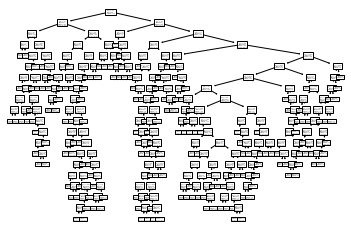

In [107]:
plot_tree(clf)